## Exploratory Data Analysis

### Explore business data

1. how many unique businesses are in the dataset
2. how many states these business are
3. what categories are the businesses fall into
4. how's the average rating of businesses in each state looks like

In [1]:
import pandas as pd
import json

In [2]:
lines=[]
with open('yelp_dataset/yelp_academic_dataset_business.json','r') as f:
    for line in f:
        lines.append(json.loads(line))

In [3]:
business=pd.DataFrame(lines)
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'RestaurantsPriceRange2': '2', 'GoodForKids':...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Thursday': '11:0-21:0', 'Tuesday': '11:0-21:...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'RestaurantsPriceRange2': '2', 'Alcohol': 'no...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Sunday': '17:0-23:0',...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'RestaurantsPriceRange2': '2', 'Alcohol': 'be...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,"{'Thursday': '10:0-22:0', 'Tuesday': '10:0-22:...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Thursday': '8:0-17:0',...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB


In [4]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


In [5]:
business.business_id.nunique()

188593

In [6]:
business.state.nunique()

69

There are 188593 unique businesses in this dataset. 

In [7]:
# let's filter out valid states

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

business=business.loc[business['state'].isin(states)]

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## distribution of businesses in Yelp dataset in each state

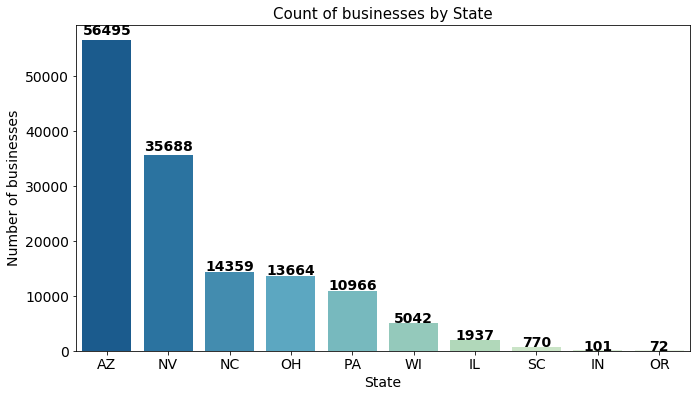

In [9]:
plt.figure(figsize=(11,6))
states_c=business.state.value_counts()[:10]
sns.barplot(states_c.index, states_c.values,palette=sns.color_palette("GnBu_r", len(states_c)) )
plt.ylabel('Number of businesses', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.title('Count of businesses by State', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(states_c):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center', fontweight='bold', fontsize=14)

10 states that have the most reviews are:
AZ,NV,NV,OH,PA,WI,IL,SC,IN, and OR

In [14]:
plt.figure(figsize=(11,6))
review_c=business.groupby('state').stars.mean().round(2)
review_c

state
AL    4.00
AR    5.00
AZ    3.75
CA    4.50
CO    4.01
DE    4.00
FL    4.00
GA    5.00
IL    3.51
IN    3.83
KY    5.00
MA    3.50
MN    4.00
MO    4.00
MT    3.00
NC    3.59
NE    4.00
NV    3.73
NY    3.21
OH    3.55
OR    4.08
PA    3.62
SC    3.65
VA    4.00
VT    4.25
WA    3.50
WI    3.65
Name: stars, dtype: float64

<Figure size 792x432 with 0 Axes>

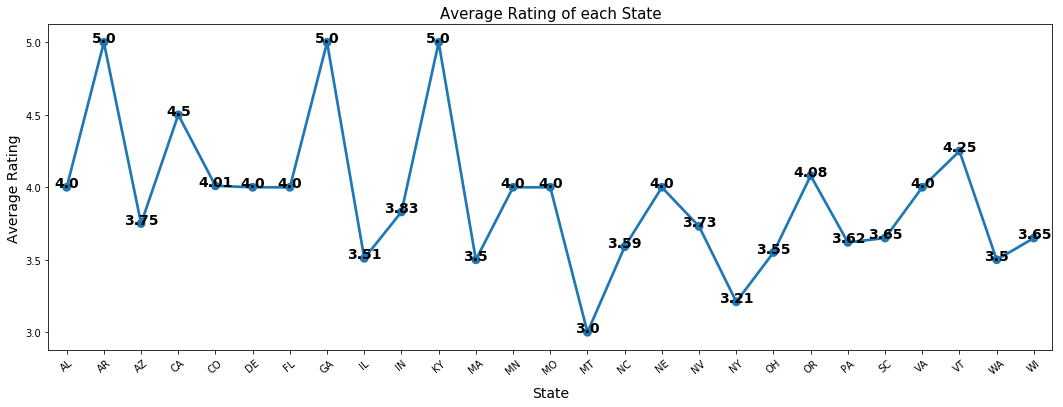

In [15]:
plt.figure(figsize=(18,6))
sns.pointplot(review_c.index, review_c.values)
plt.xlabel('State', labelpad=10, fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating of each State', fontsize=15)
plt.xticks(rotation=40)
for  i, v in enumerate(review_c):
    plt.text(i, v, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

In [26]:
star_c=business.groupby('stars').business_id.count()
star_c

stars
1.0     3196
1.5     3423
2.0     7439
2.5    12667
3.0    16852
3.5    23236
4.0    24864
4.5    20464
5.0    27042
Name: business_id, dtype: int64

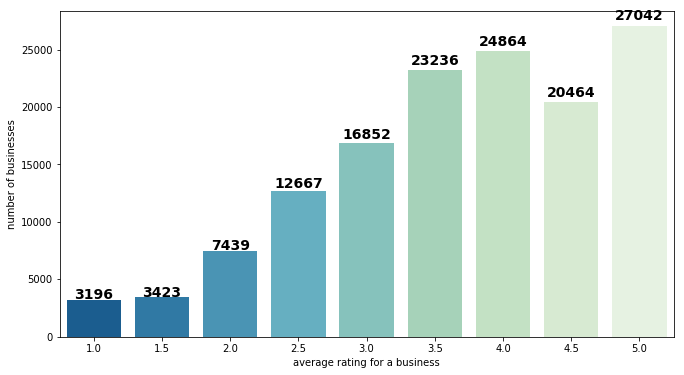

In [30]:
plt.figure(figsize=(11,6))
sns.barplot(star_c.index, star_c.values, palette=sns.color_palette("GnBu_r", len(star_c)))
plt.xlabel('average rating for a business')
plt.ylabel('number of businesses')
for  i, v in enumerate(star_c):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center', fontweight='bold', fontsize=14)

The majority of business get positive ratings (ratings >3.0)

Let's look at business categories in our data set.

Text(0.5,0,'Number of businesses')

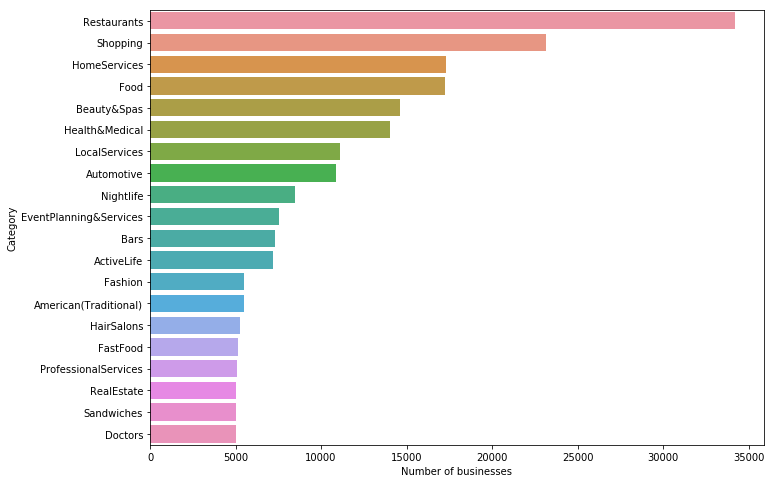

In [82]:
plt.figure(figsize=(11,8))
cats=','.join(business['categories'].dropna()).replace(' ','')
cats_pd=pd.DataFrame(cats.split(','),columns=['category'])
cats_counts=cats_pd.category.value_counts()[:20]

sns.barplot(cats_counts.values,cats_counts.index)
plt.ylabel('Category')
plt.xlabel('Number of businesses')

Businesses relate to food is the majority category in the data set.

## distribution of reviews

1. how many reviews are in the dataset
2. how many unique users make the reviews
3. how many businesses are covered in the reviews data set
4. the distribution of ratings

In [22]:
# load review data

lines=[]
with open('yelp_dataset/yelp_academic_dataset_review.json', 'r') as f:
    for line in f:
        json_data=json.loads(line)
        lines.append(json_data)
        
review=pd.DataFrame(lines)
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [23]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996996 entries, 0 to 5996995
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 411.8+ MB


In [24]:
print('number of unique business: ',review.business_id.nunique())
print('number of unique users: ',review.user_id.nunique())

number of unique business:  188593
number of unique users:  1518169


There are ~6M reviews by ~1.5M users about ~190K businesses.

In [29]:
stars=review.groupby('stars').text.count()
stars

stars
0          1
1     858139
2     487813
3     673206
4    1335957
5    2641880
Name: text, dtype: int64

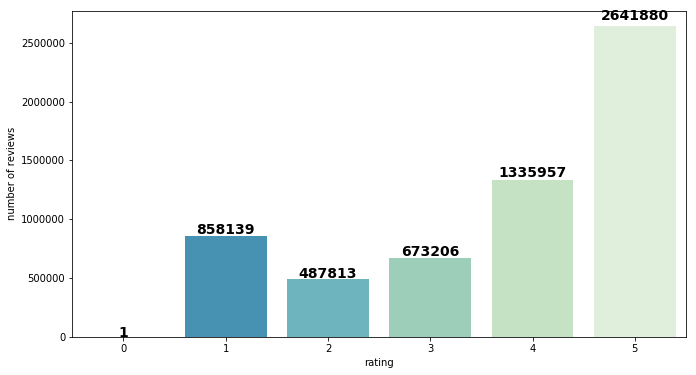

In [31]:
plt.figure(figsize=(11,6))
sns.barplot(stars.index, stars.values, palette=sns.color_palette("GnBu_r", len(stars)))
plt.xlabel('rating')
plt.ylabel('number of reviews')
for  i, v in enumerate(stars):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center', fontweight='bold', fontsize=14)

There are much more positive reviews than negative reviews. In the machine learning model, it's better to use balanced data set. Thus, we can sample equal number of positive and negative reviews. To avoid ambuguity, we ignore reviews that are neutral (star 3) and consider rating >3 as positive sentiment and rating <3 as negative sentiment.